In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.ensemble import IsolationForest
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE
import itertools

In [4]:
# Load Dataset
url = "/Users/sandeepundurthi/Desktop/Credit/creditcard.csv"  # Replace with actual dataset path
data = pd.read_csv(url)

In [6]:
# Exploratory Data Analysis (EDA)
print(data.head())



   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [8]:
print(data.isnull().sum())  # Check for missing values
print(data.describe())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027

In [10]:
# Handle missing values (if any)
data.fillna(data.median(), inplace=True)

In [12]:
# Calculate Fraud vs Non-Fraud Percentage
fraud_percentage = data['Class'].value_counts(normalize=True) * 100
print(f"Non-Fraud Transactions: {fraud_percentage[0]:.2f}%")
print(f"Fraud Transactions: {fraud_percentage[1]:.2f}%")

Non-Fraud Transactions: 99.83%
Fraud Transactions: 0.17%


In [14]:
# Split Data
X = data.drop(columns=['Class'])
y = data['Class']

In [16]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56863
           1       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

XGBoost Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted

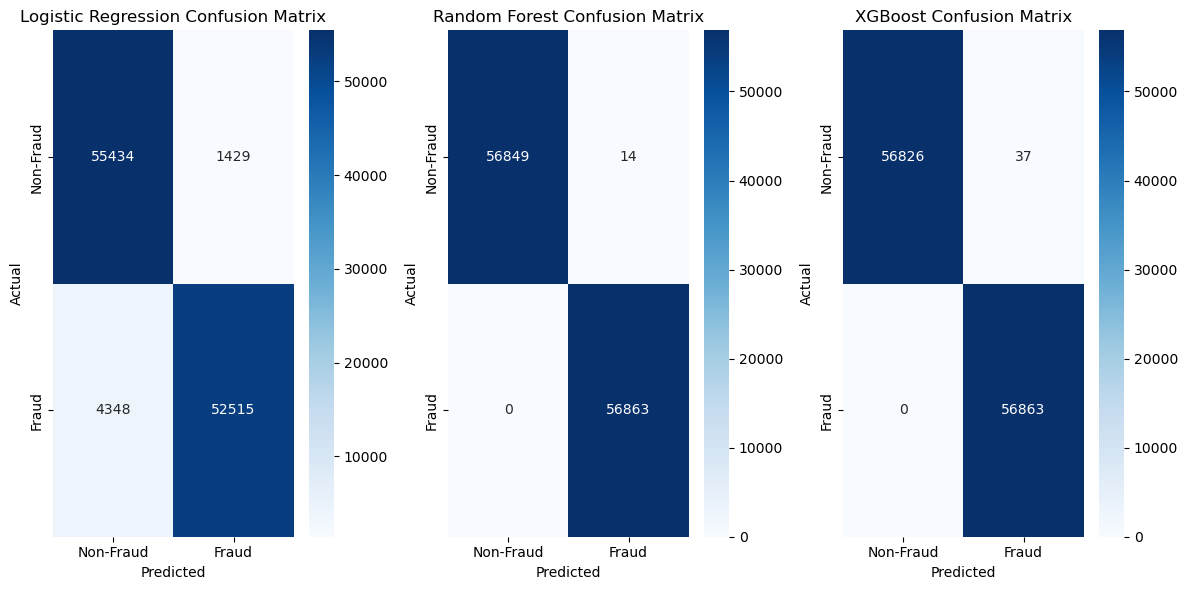

In [28]:
# Train Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier()
}

model_predictions = {}
plt.figure(figsize=(12, 6))
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_predictions[name] = y_pred
    print(f"{name} Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    ax = plt.subplot(1, len(models), i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'{name} Confusion Matrix')
plt.tight_layout()
plt.show()

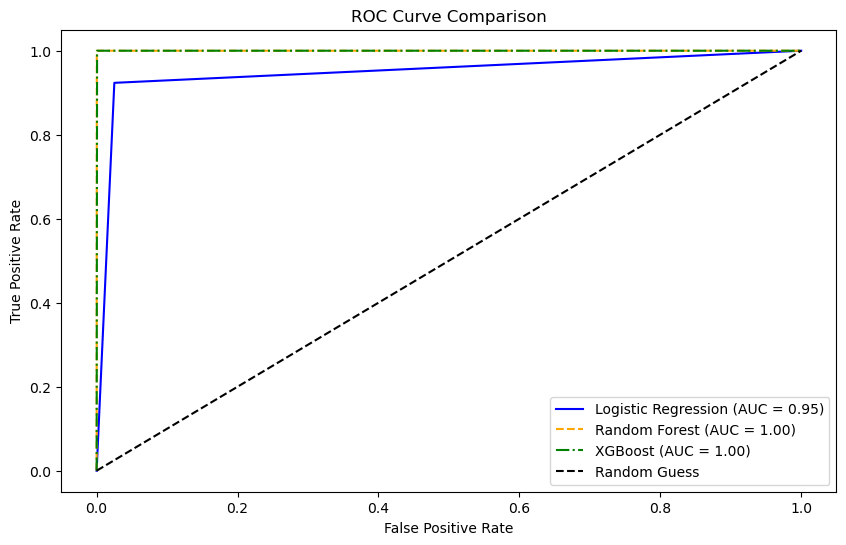

In [38]:
# ROC Curve
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green']
linestyles = ['-', '--', '-.']
for (name, y_pred), color, ls in zip(model_predictions.items(), colors, linestyles):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred):.2f})', color=color, linestyle=ls)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


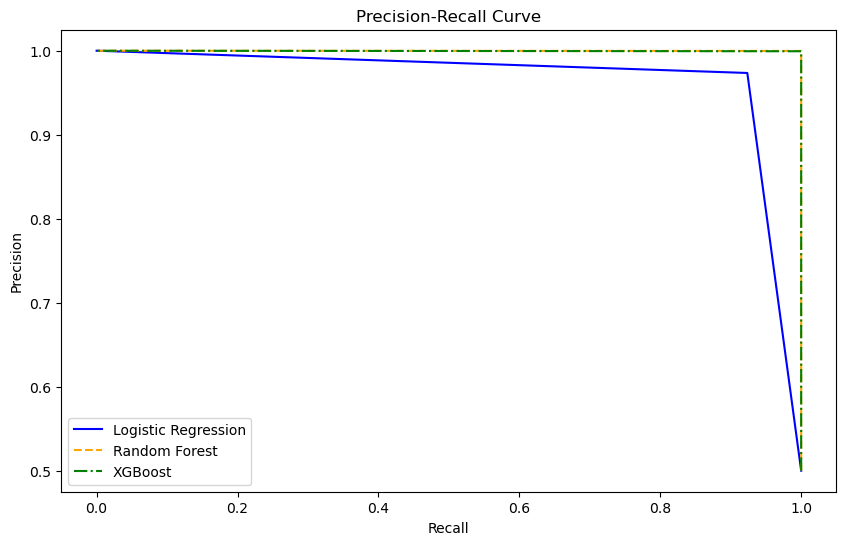

In [40]:
# Precision-Recall Curve
plt.figure(figsize=(10, 6))
for (name, y_pred), color, ls in zip(model_predictions.items(), colors, linestyles):
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, label=f'{name}', color=color, linestyle=ls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [34]:
# Model Evaluation
for name, y_pred in model_predictions.items():
    print(f"{name} AUC-ROC Score: {roc_auc_score(y_test, y_pred):.4f}")

Logistic Regression AUC-ROC Score: 0.9492
Random Forest AUC-ROC Score: 0.9999
XGBoost AUC-ROC Score: 0.9997


In [42]:
# Deep Learning - Autoencoder for Anomaly Detection
autoencoder = Sequential([
    Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(15, activation='relu'),
    Dense(30, activation='relu'),
    Dense(X_train.shape[1], activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 10s 650us/step - loss: 10.8466 - val_loss: 10.7231
Epoch 2/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 6s 429us/step - loss: 10.7097 - val_loss: 10.7121
Epoch 3/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 8s 592us/step - loss: 10.7488 - val_loss: 10.7094
Epoch 4/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 9s 613us/step - loss: 10.6848 - val_loss: 10.7032
Epoch 5/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 9s 634us/step - loss: 10.7529 - val_loss: 10.7001
Epoch 6/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 9s 651us/step - loss: 10.6246 - val_loss: 10.6987
Epoch 7/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 8s 576us/step - loss: 10.6643 - val_loss: 10.6978
Epoch 8/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 8s 585us/step - loss: 10.6667 - val_loss: 10.6975
Epoch 9/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 8s 543us/step - loss: 10.7687 - val_loss: 10.6979
Epoch 10/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 8s 544us/step - loss: 10.6575 - val_loss: 10.6962


In [44]:
# Compute reconstruction error
X_test_reconstructed = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_reconstructed, 2), axis=1)
threshold = np.percentile(mse, 95)  # Set threshold at 95th percentile


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 1s 261us/step


In [46]:
# Predictions
y_pred_autoencoder = (mse > threshold).astype(int)


In [48]:
# Autoencoder Evaluation
print("Autoencoder Report:")
print(classification_report(y_test, y_pred_autoencoder))

Autoencoder Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.69     56863
           1       1.00      0.10      0.18     56863

    accuracy                           0.55    113726
   macro avg       0.76      0.55      0.44    113726
weighted avg       0.76      0.55      0.44    113726



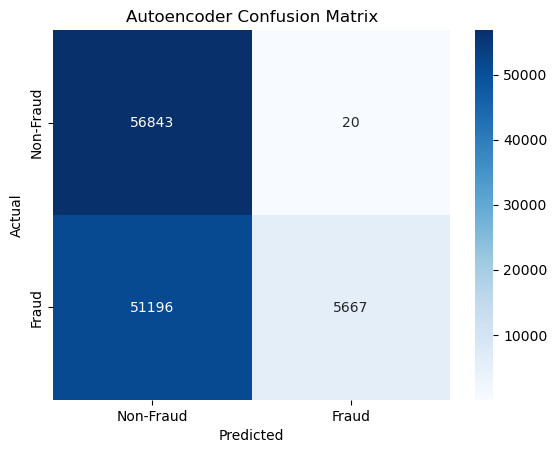

In [50]:
# Confusion Matrix for Autoencoder
cm_autoencoder = confusion_matrix(y_test, y_pred_autoencoder)
sns.heatmap(cm_autoencoder, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Autoencoder Confusion Matrix')
plt.show()